# 120 Years of Olympic History: Athletes and Results

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## First Exploration of the Data

### Infomation about the dataset from Kaggle:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

In [3]:
os_data = pd.read_csv("Data/athlete_events.csv")
os_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
os_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
os_data.info() #There are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Exercise 0

### a) How many countries are represented in the dataset?

In [6]:
print(f"Number of countries represented in the dataset: {len(os_data['NOC'].unique())}.")

Number of countries represented in the dataset: 230.


There are more countries represented in the dataset, than there are countries in the world right now. This is because countries that no longer exists (e.g. Soviet Union (URS), see below), are still represented in the data.

### b) Which countries are represented in the dataset? 

In [7]:
for country in sorted(os_data["NOC"].unique()):
    print(country, end = " ")

AFG AHO ALB ALG AND ANG ANT ANZ ARG ARM ARU ASA AUS AUT AZE BAH BAN BAR BDI BEL BEN BER BHU BIH BIZ BLR BOH BOL BOT BRA BRN BRU BUL BUR CAF CAM CAN CAY CGO CHA CHI CHN CIV CMR COD COK COL COM CPV CRC CRO CRT CUB CYP CZE DEN DJI DMA DOM ECU EGY ERI ESA ESP EST ETH EUN FIJ FIN FRA FRG FSM GAB GAM GBR GBS GDR GEO GEQ GER GHA GRE GRN GUA GUI GUM GUY HAI HKG HON HUN INA IND IOA IRI IRL IRQ ISL ISR ISV ITA IVB JAM JOR JPN KAZ KEN KGZ KIR KOR KOS KSA KUW LAO LAT LBA LBR LCA LES LIB LIE LTU LUX MAD MAL MAR MAS MAW MDA MDV MEX MGL MHL MKD MLI MLT MNE MON MOZ MRI MTN MYA NAM NBO NCA NED NEP NFL NGR NIG NOR NRU NZL OMA PAK PAN PAR PER PHI PLE PLW PNG POL POR PRK PUR QAT RHO ROT ROU RSA RUS RWA SAA SAM SCG SEN SEY SGP SKN SLE SLO SMR SOL SOM SRB SRI SSD STP SUD SUI SUR SVK SWE SWZ SYR TAN TCH TGA THA TJK TKM TLS TOG TPE TTO TUN TUR TUV UAE UAR UGA UKR UNK URS URU USA UZB VAN VEN VIE VIN VNM WIF YAR YEM YMD YUG ZAM ZIM 

### c) Which sports are represented in the dataset?

In [8]:
for sport in sorted(os_data["Sport"].unique()):
    print(sport, end = ", ")

Aeronautics, Alpine Skiing, Alpinism, Archery, Art Competitions, Athletics, Badminton, Baseball, Basketball, Basque Pelota, Beach Volleyball, Biathlon, Bobsleigh, Boxing, Canoeing, Cricket, Croquet, Cross Country Skiing, Curling, Cycling, Diving, Equestrianism, Fencing, Figure Skating, Football, Freestyle Skiing, Golf, Gymnastics, Handball, Hockey, Ice Hockey, Jeu De Paume, Judo, Lacrosse, Luge, Military Ski Patrol, Modern Pentathlon, Motorboating, Nordic Combined, Polo, Racquets, Rhythmic Gymnastics, Roque, Rowing, Rugby, Rugby Sevens, Sailing, Shooting, Short Track Speed Skating, Skeleton, Ski Jumping, Snowboarding, Softball, Speed Skating, Swimming, Synchronized Swimming, Table Tennis, Taekwondo, Tennis, Trampolining, Triathlon, Tug-Of-War, Volleyball, Water Polo, Weightlifting, Wrestling, 

### d) Which medals are represented in the dataset?

In [9]:
for medal in os_data["Medal"][os_data["Medal"].notna()].unique():
    print(medal)

Gold
Bronze
Silver


### e) Statistics for the age: mean, median, min, max, std

In [10]:
os_data["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [11]:
os_data["Age"].median()

24.0

#### Statistics for age:
Mean: 25.6<br>
Median: 24<br>
Min: 10<br>
Max: 97<br>
Standard deviation: 6.4

### f) Continue exploring the data with own questions

### What is the length of the tallest and the shortest participant (for men and women)?

In [12]:
os_data["Height"].groupby(os_data["Sex"]).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,67378.0,167.839740,8.778528,127.0,162.0,168.0,173.0,213.0
M,143567.0,178.858463,9.360318,127.0,172.0,179.0,185.0,226.0


### What is the weight of the tallest and the shortest participant (for men and women)?

In [13]:
os_data["Weight"].groupby(os_data["Sex"]).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,66771.0,60.021252,10.21225,25.0,54.0,59.0,65.0,167.0
M,141470.0,75.743677,13.21161,28.0,67.0,74.0,83.0,214.0


In [14]:
os_data["Height"].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [15]:
os_data["Weight"].describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

The tallest participant was 226 cm and the shortest was 127 cm. <br/>
The lightest participant weighed 25 kg and the heaviest weighed 214 kg.

### g) Plot features from the data - pie chart for gender

In [20]:
#Create new data frame with gender count
#We have to group by ID, otherwise some people (who participated several times) will be counted more than once.
count = [len(os_data[os_data["Sex"] == "F"].groupby(os_data["ID"])), 
        len(os_data[os_data["Sex"] == "M"].groupby(os_data["ID"]))]

gender_count_ID = pd.DataFrame(dict(Gender=["Female", "Male"], Count=count))
gender_count_ID

,Gender,Count
0,Female,33981
1,Male,101590


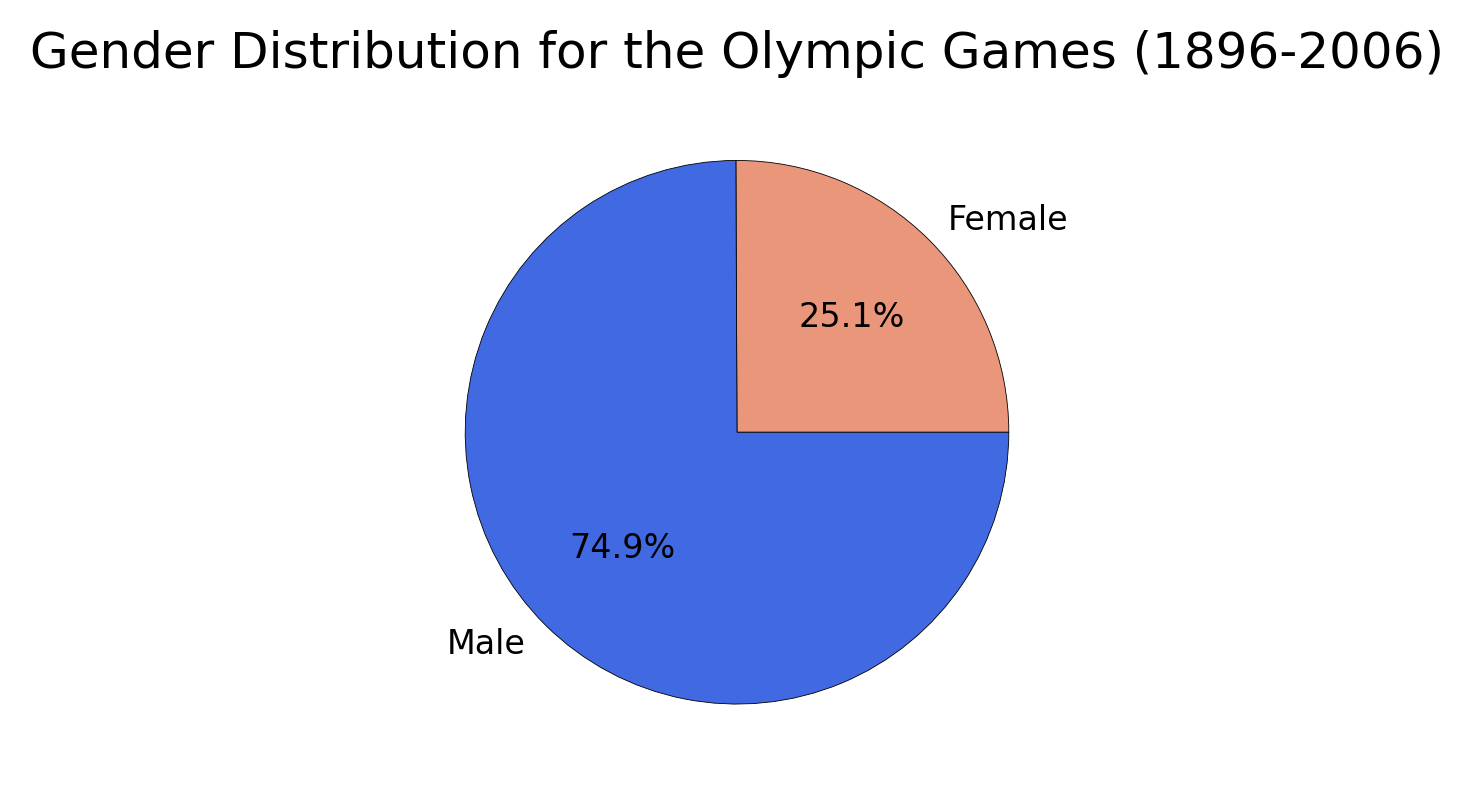

In [21]:
#Plotting data split on ID
fig, ax = plt.subplots(dpi=300, figsize=(3,3), facecolor="white")

ax.pie(gender_count_ID["Count"], 
    labels=gender_count_ID["Gender"], 
    colors=["darksalmon", "royalblue"],
    autopct="%.1f%%", #Adds percentage
    wedgeprops={"linewidth": 0.2, "edgecolor": "black"}, 
    textprops={'size': 8}
    );

_ = ax.set_title("Gender Distribution for the Olympic Games (1896-2006)", fontsize=12)

#Reference for styling: https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/

### h) Plot features from the data - bar chart for top 10 countries that have won most prices

In [22]:
#Remove NaN
medals = os_data[os_data["Medal"].isna() == False]
medals.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [23]:
medals.info() #No null values for Medal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Sex     39783 non-null  object 
 3   Age     39051 non-null  float64
 4   Height  31072 non-null  float64
 5   Weight  30456 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.9+ MB


In [27]:
#Removes team sports
medals_count_per_sport = medals.drop_duplicates(subset=["NOC", "Event", "Games", "Medal"]).reset_index(drop=True)
medals_count_per_sport

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver
18901,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze
18902,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
18903,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver


In [28]:
medals_count_per_sport = pd.DataFrame({"Number medals won": medals_count_per_sport["Medal"].groupby(medals_count_per_sport["NOC"]).count()}).reset_index()
medals_count_per_sport

,NOC,Number medals won
0,AFG,2
1,AHO,1
2,ALG,17
3,ANZ,12
4,ARG,74
...,...,...
144,VIE,4
145,WIF,2
146,YUG,87
147,ZAM,2


In [30]:
#Pick out the top 10 countries
top_countries_per_sport = medals_count_per_sport.sort_values(by="Number medals won", ascending=False).head(10)
top_countries_per_sport

,NOC,Number medals won
141,USA,2823
139,URS,1197
49,GER,1004
46,GBR,919
43,FRA,879
67,ITA,722
123,SWE,657
22,CHN,595
112,RUS,584
47,GDR,519


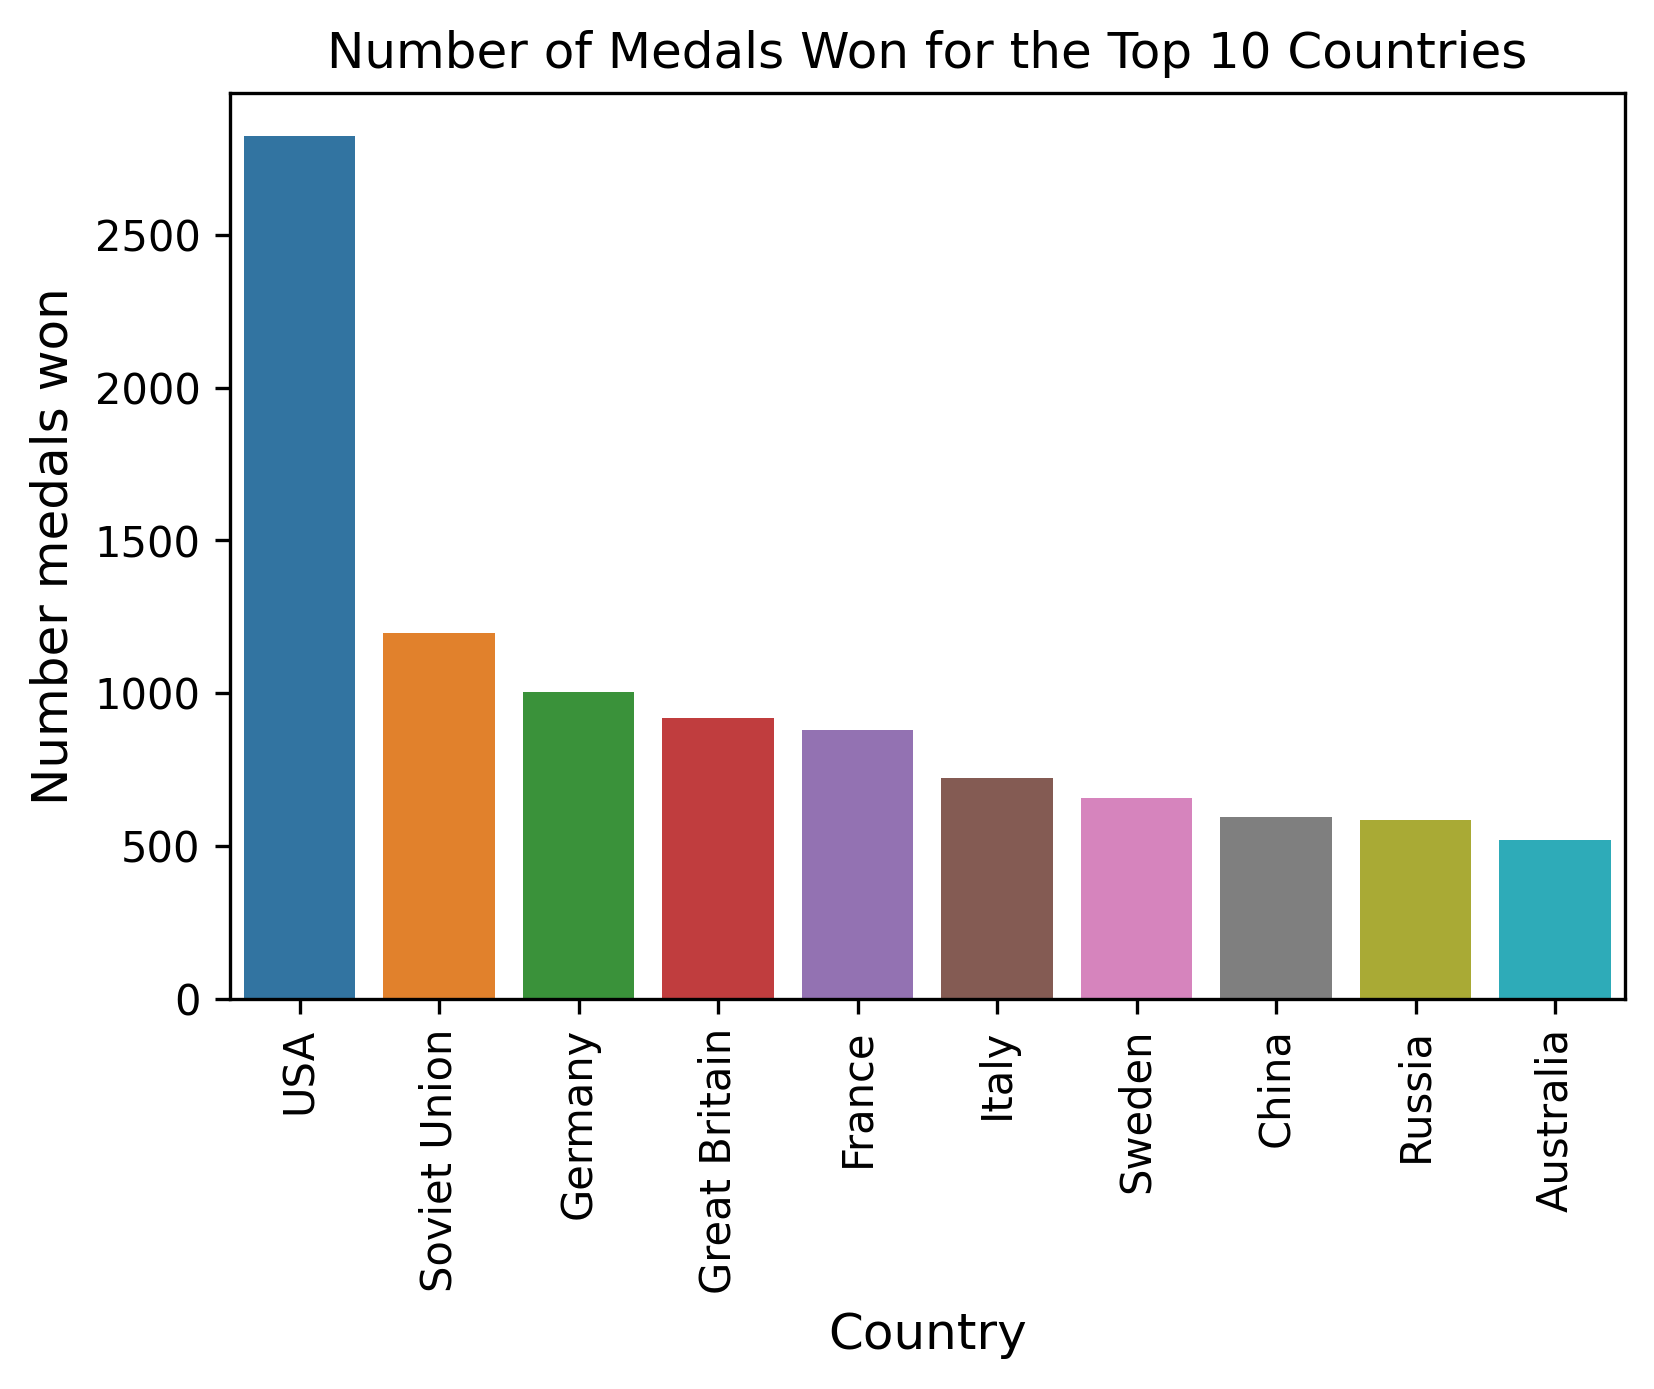

In [34]:
#Plot the top ten countries for number of medals won
plt.figure(dpi=300, facecolor="white")

fig = sns.barplot(data=top_countries_per_sport, 
                x="NOC",
                y="Number medals won"
                )

fig.set(title="Number of Medals Won for the Top 10 Countries", 
        xticks=fig.get_xticks(),
        )
fig.set_ylabel(fig.get_ylabel(), size=12)
fig.set_xlabel("Country", size=12)

_ = fig.set_xticklabels(["USA", "Soviet Union", "Germany", "Great Britain", "France", "Italy", "Sweden", "China", "Russia", "Australia"], 
                    rotation=90
                    )

### i) Plot features from the data - other

### The top ten participants (who have won the most medals)

In [37]:
#Create new dataframe with the top ten participants sorted
most_wins = pd.DataFrame(os_data["Name"].value_counts()).sort_values(by="Name", ascending=False).head(10).reset_index()
most_wins.rename(columns={"index":"Name", "Name":"Number of medals"}, inplace=True)
most_wins

,Name,Number of medals
0,Robert Tait McKenzie,58
1,Heikki Ilmari Savolainen,39
2,"Joseph ""Josy"" Stoffel",38
3,Ioannis Theofilakis,36
4,Takashi Ono,33
5,Andreas Wecker,32
6,Alexandros Theofilakis,32
7,Alfrd (Arnold-) Hajs (Guttmann-),32
8,Jean Lucien Nicolas Jacoby,32
9,Michel Mathiot,31


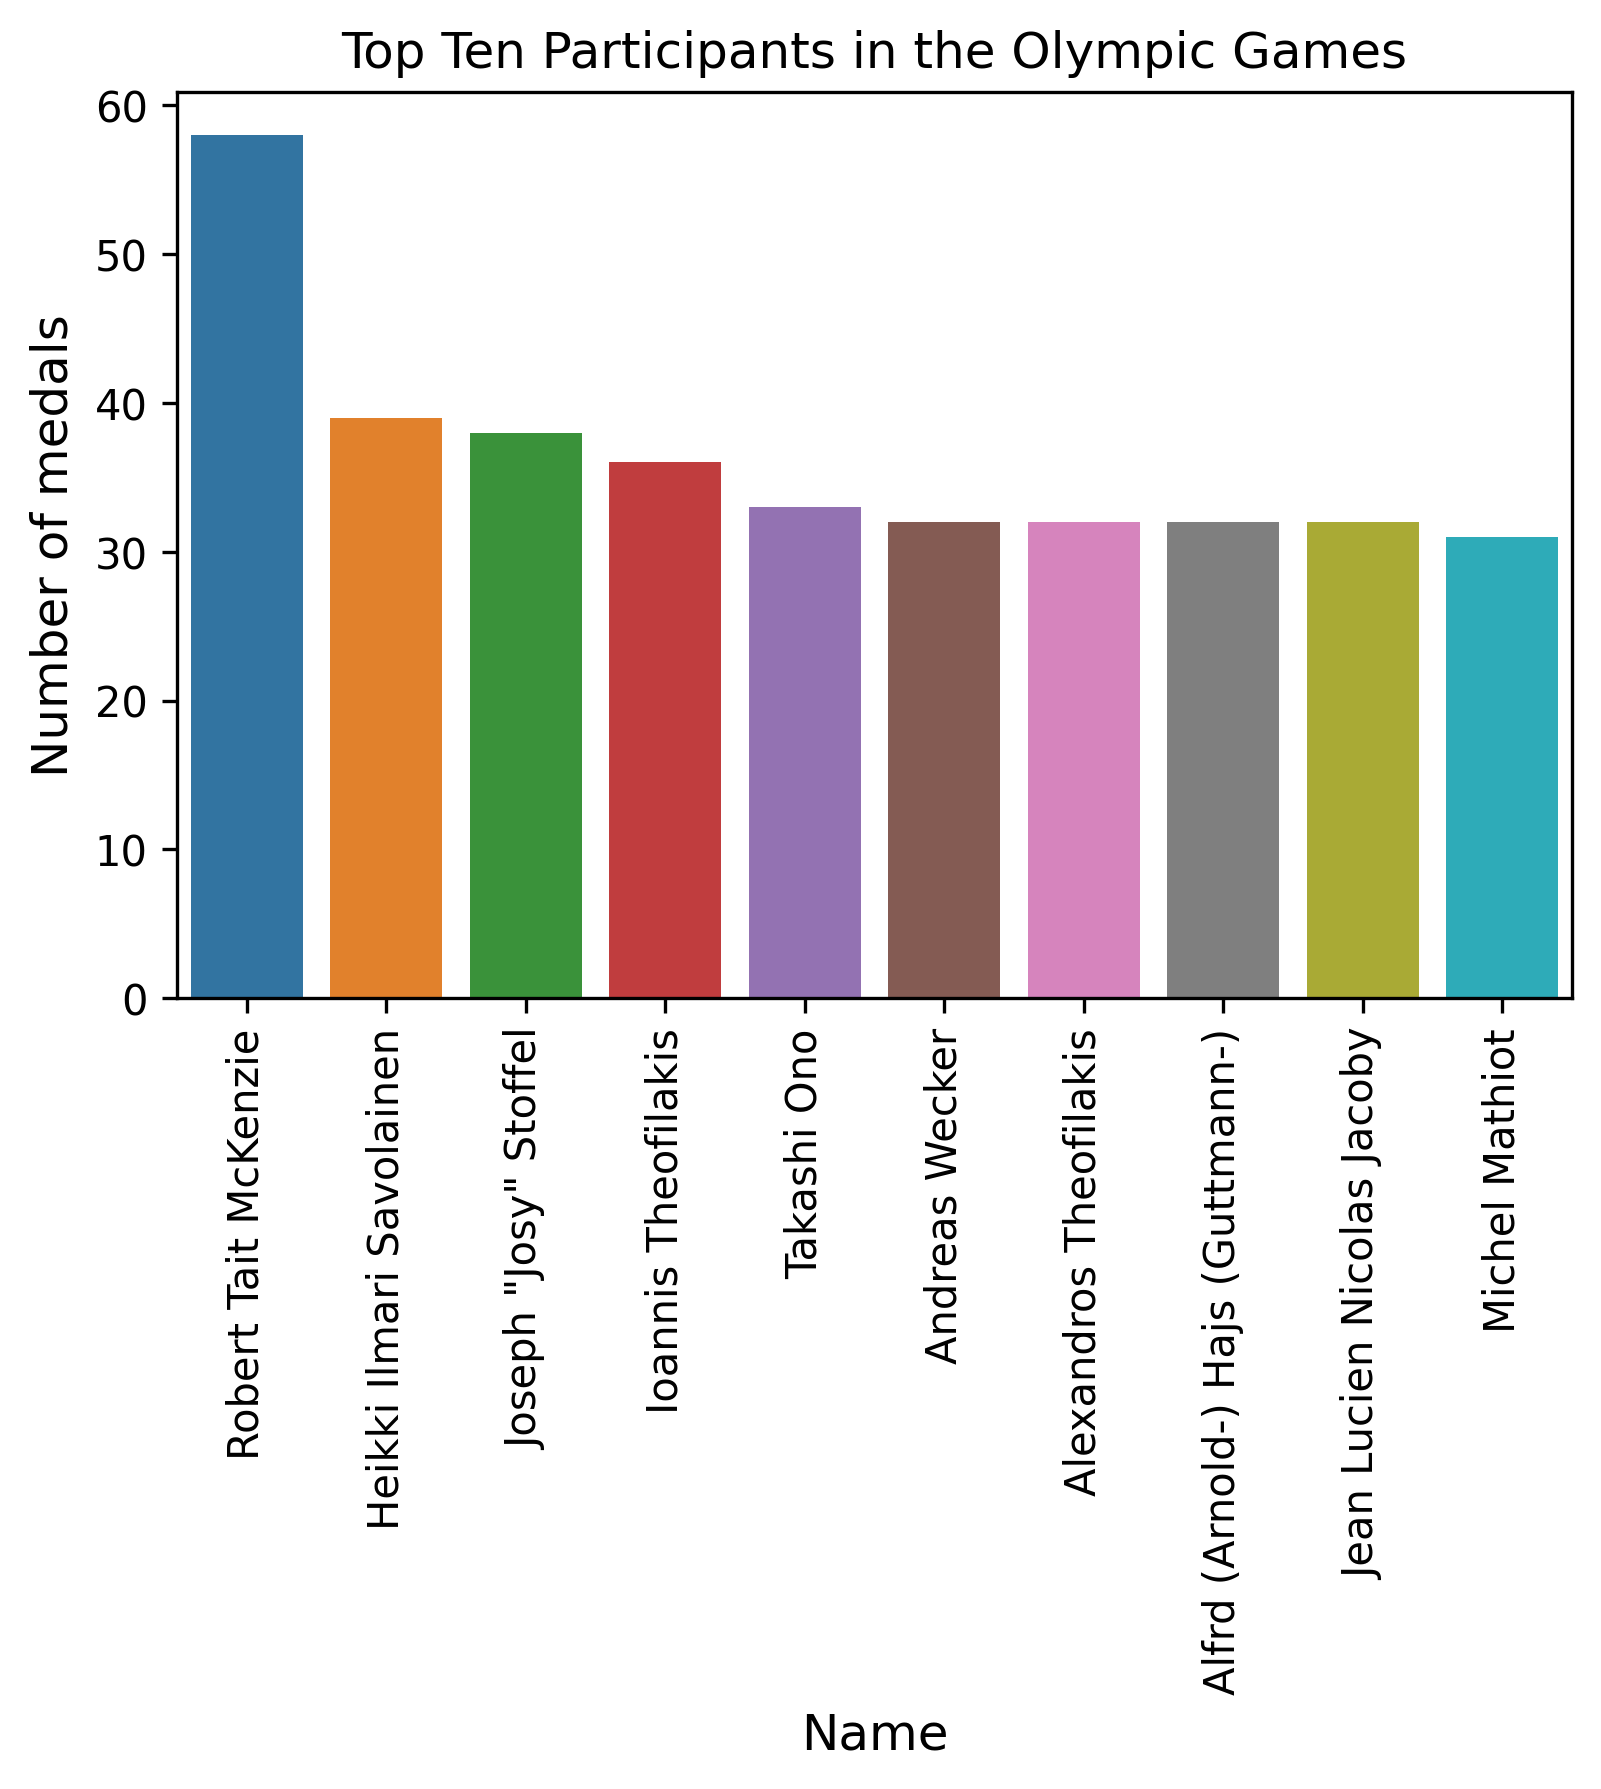

In [39]:
#Plot top ten participants
plt.figure(dpi=300, facecolor="white")

fig = sns.barplot(data=most_wins, 
                x="Name",
                y="Number of medals"
                )

fig.set(title="Top Ten Participants in the Olympic Games")
fig.set_ylabel(fig.get_ylabel(), size=12)
fig.set_xlabel(fig.get_xlabel(), size=12)
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

### The Most Common Ages to Win a Gold Medal

In [43]:
#Create dataframe for the number of Gold medals per age and sort them
age_gold = os_data[["Medal", "Age"]][os_data["Medal"] == "Gold"]
total_gold = pd.DataFrame(dict(total = age_gold["Medal"].groupby(age_gold["Age"]).count())).reset_index()
total_gold = total_gold.sort_values("total", ascending=False)[:10].reset_index(drop=True)
total_gold

,Age,total
0,23.0,1136
1,24.0,1135
2,22.0,1096
3,25.0,1056
4,26.0,976
5,21.0,925
6,27.0,863
7,28.0,802
8,20.0,674
9,29.0,649


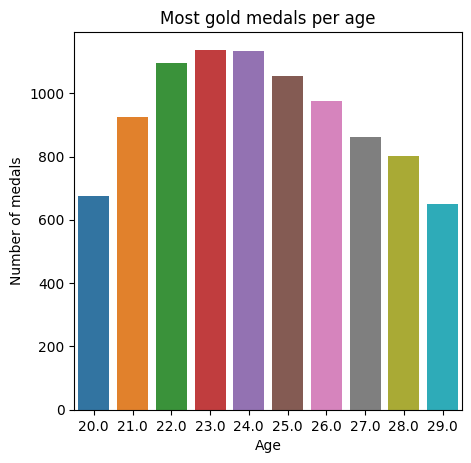

In [44]:
#Plot most gold medals per age
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.barplot(data=total_gold, y="total", x="Age")
ax.set_title("Most gold medals per age")
ax.set_ylabel("Number of medals")
ax.set_xlabel("Age")
plt.show()

## Some Other Thoughts

We ran into a problem quite early on, that took some time to figure out. When comparing the total number of medals, as calculated after picking out only the US data, with the total number of medals for the US when running drop_duplicates(subset=["Event", "Games" "Medal"]), using the full dataset, we did not get the same result.

In [48]:
test1 = os_data.dropna(subset=["Medal"])
test1 = test1.drop_duplicates(subset=["Event", "Games", "Medal"])
test1 = test1[test1["NOC"] == "USA"]
print(f"When first removing the duplicates and then picking out the US data, the length is: {len(test1)}")

test2 = os_data.dropna(subset=["Medal"])
test2 = test2[test2["NOC"] == "USA"]
test2 = test2.drop_duplicates(subset=["Event", "Games", "Medal"])
print(f"When first picking out the US data and then removing the duplicates, the length is: {len(test2)}")

When first removing the duplicates and then picking out the US data, the length is: 2779
When first picking out the US data and then removing the duplicates, the length is: 2823


We started investigating this further and looked at some of the specific values.

In [49]:
os_data[os_data["Year"] == 2000][os_data["Event"] == "Boxing Men's Bantamweight"][os_data["Medal"].notna()]

/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_38195/48455323.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  os_data[os_data["Year"] == 2000][os_data["Event"] == "Boxing Men's Bantamweight"][os_data["Medal"].notna()]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
49161,25317,Serhiy Petrovych Danylchenko,M,26.0,162.0,54.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Bantamweight,Bronze
147359,73957,Raimkul Khadoynazarovich Malakhbekov,M,26.0,168.0,54.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Bantamweight,Silver
200729,100810,Guillermo Rigondeaux Ortz,M,19.0,166.0,54.0,Cuba,CUB,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Bantamweight,Gold
253138,126760,Clarence Adam Vinson,M,22.0,155.0,54.0,United States,USA,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Bantamweight,Bronze


We realised that the problem was that we did not account for ties and two people share a medal. The second row will be discarded, as if it was a team sport. This explained the difference in the total number of medals for the US (when the participant from US occured secondly in the data, the row was removed). This was solved by including the "NOC" as well. 

In [50]:
test3 = os_data.dropna(subset=["Medal"])
test3 = test3.drop_duplicates(subset=["NOC", "Event", "Games", "Medal"])
test3 = test3[test3["NOC"] == "USA"]
print(f"When including NOC in drop duplicates, the length is: {len(test3)}")

When including NOC in drop duplicates, the length is: 2823


However, there will still be some rows that will be incorrecly removed this way. This will happen when two participants from the same country has shared a medal. These cases are quite rare, but will nevertheless affect the data. This could be solved by for example importing data from Wikipedia on ties in the Olympic Games. <https://en.wikipedia.org/wiki/List_of_ties_for_medals_at_the_Olympics>

## Exercise 1

In [51]:
os_data["Name"]

0                        A Dijiang
1                         A Lamusi
2              Gunnar Nielsen Aaby
3             Edgar Lindenau Aabye
4         Christine Jacoba Aaftink
                    ...           
271111                  Andrzej ya
271112                    Piotr ya
271113                    Piotr ya
271114          Tomasz Ireneusz ya
271115          Tomasz Ireneusz ya
Name: Name, Length: 271116, dtype: object

In [52]:
os_data["Name"] = os_data["Name"].apply(lambda name:hl.sha256(name.encode()).hexdigest())

In [53]:
os_data["Name"]

0         3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...
1         a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...
2         9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...
3         0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...
4         5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...
                                ...                        
271111    07f491e055f56a7a7be133c9cf6563c253d3aa0d137630...
271112    2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...
271113    2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...
271114    e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...
271115    e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...
Name: Name, Length: 271116, dtype: object